### This code plot the most pearson's correlated Biochemical processes against the amount of cosmic radiations absorbed in-flights, post-flight and a combination of both. 

In [1]:
import pandas as pd
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('../../All_strain.xlsx')
df

,Organ,Radio_Sensitivity,mGy_Absorbed,ISS_Days,Return_Days,Sex,Strain,Age,Mission,MT_Central_Dogma,...,mtDNA_Activated,mtdsRNA_Activated,ISR,UPR,Induced_Senescence,Inhibited_Senescence,Necroptosis,Apoptosis,Pyroptosis,Extracellular_Matrix
0,Spleen,1,8.9700,39.00,1,M,C57BL/6,8.0,MHU-1,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.875506
1,Thymus,1,3.1500,13.00,1,F,C57BL/6,8.0,STS-118,-2.000000,...,-1.346757,-1.458871,-1.663817,-2.093026,-1.927908,-1.923250,-1.265627,-1.365548,-1.511577,-1.554172
2,Thymus,1,8.9700,39.00,1,M,C57BL/6,8.0,MHU-1,-1.000000,...,0.000000,1.818500,0.000000,0.000000,0.000000,-1.784773,0.000000,0.000000,0.000000,2.251925
3,Muscle,4,5.0875,22.50,0,M,C57BL/6,9.0,RR-4,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Liver,3,4.6600,12.76,1,F,C57BL/6,9.0,STS-135,0.000000,...,0.000000,-1.542452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.236438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,Skin,2,21.9530,75.00,0,F,C57BL/6,11.0,RR-7,-1.951596,...,0.000000,1.723189,0.000000,0.000000,0.000000,-1.962828,0.000000,0.000000,0.000000,1.706154
532,Muscle,4,30.0700,29.85,1,M,C57BL/6,19.5,BION-M1,-3.000000,...,1.797901,0.000000,0.000000,-1.714215,0.000000,0.000000,1.444190,0.000000,0.000000,0.000000
533,Muscle,4,30.0700,29.85,1,M,C57BL/6,19.5,BION-M1,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.323836,0.000000,0.000000,0.000000,-1.423649
534,Muscle,4,30.0700,29.85,1,M,C57BL/6,19.5,BION-M1,-2.000000,...,0.000000,0.000000,0.000000,-1.577384,1.325273,1.540694,0.000000,0.000000,0.000000,-1.475530


### Inflight vs Post-flight

In [3]:
# In-flight
di = df[df['Return_Days'] < 1]
di

,Organ,Radio_Sensitivity,mGy_Absorbed,ISS_Days,Return_Days,Sex,Strain,Age,Mission,MT_Central_Dogma,...,mtDNA_Activated,mtdsRNA_Activated,ISR,UPR,Induced_Senescence,Inhibited_Senescence,Necroptosis,Apoptosis,Pyroptosis,Extracellular_Matrix
3,Muscle,4,5.0875,22.5,0,M,C57BL/6,9.0,RR-4,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
14,Liver,3,6.4700,22.5,0,F,BALB/c,11.0,RRRM-1/RR-8,0.000000,...,0.0,0.000000,0.0,0.0,1.285257,1.276874,0.0,0.0,0.00000,0.000000
15,Kidney,3,6.4625,25.0,0,F,C3H/HeJ,11.0,RR-7,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
16,Kidney,3,6.4625,25.0,0,F,C57BL/6,11.0,RR-7,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
17,Kidney,3,19.3875,75.0,0,F,C3H/HeJ,11.0,RR-7,-2.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,2.270018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Heart,3,17.8450,55.0,0,F,C57BL/6,29.0,RRRM-2/RR-17,-2.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
528,Kidney,3,19.3875,75.0,0,F,C3H/HeJ,11.0,RR-7,-2.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,2.270018
529,Kidney,3,19.3875,75.0,0,F,C57BL/6,11.0,RR-7,-3.000000,...,0.0,1.535754,0.0,0.0,1.366998,0.000000,0.0,0.0,1.44469,2.150134
530,Skin,2,21.9528,75.0,0,F,C3H/HeJ,11.0,RR-7,-1.869951,...,0.0,0.000000,0.0,0.0,0.000000,-1.664703,0.0,0.0,0.00000,1.573872


In [4]:
# Post-flight
dp = df[df['Return_Days'] > 0]
dp

,Organ,Radio_Sensitivity,mGy_Absorbed,ISS_Days,Return_Days,Sex,Strain,Age,Mission,MT_Central_Dogma,...,mtDNA_Activated,mtdsRNA_Activated,ISR,UPR,Induced_Senescence,Inhibited_Senescence,Necroptosis,Apoptosis,Pyroptosis,Extracellular_Matrix
0,Spleen,1,8.970,39.00,1,M,C57BL/6,8.0,MHU-1,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.875506
1,Thymus,1,3.150,13.00,1,F,C57BL/6,8.0,STS-118,-2.0,...,-1.346757,-1.458871,-1.663817,-2.093026,-1.927908,-1.923250,-1.265627,-1.365548,-1.511577,-1.554172
2,Thymus,1,8.970,39.00,1,M,C57BL/6,8.0,MHU-1,-1.0,...,0.000000,1.818500,0.000000,0.000000,0.000000,-1.784773,0.000000,0.000000,0.000000,2.251925
4,Liver,3,4.660,12.76,1,F,C57BL/6,9.0,STS-135,0.0,...,0.000000,-1.542452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.236438
5,Liver,3,4.660,12.76,1,F,C57BL/6,9.0,STS-135,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.275027,0.000000,0.000000,0.000000,-1.178671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,Muscle,4,13.135,37.00,1,M,C57BL/6,16.5,RR-23,0.0,...,0.000000,0.000000,0.000000,-1.563117,-1.328988,0.000000,0.000000,0.000000,0.000000,0.000000
532,Muscle,4,30.070,29.85,1,M,C57BL/6,19.5,BION-M1,-3.0,...,1.797901,0.000000,0.000000,-1.714215,0.000000,0.000000,1.444190,0.000000,0.000000,0.000000
533,Muscle,4,30.070,29.85,1,M,C57BL/6,19.5,BION-M1,-2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.323836,0.000000,0.000000,0.000000,-1.423649
534,Muscle,4,30.070,29.85,1,M,C57BL/6,19.5,BION-M1,-2.0,...,0.000000,0.000000,0.000000,-1.577384,1.325273,1.540694,0.000000,0.000000,0.000000,-1.475530


### All Samples

#### Mitochondria Processes

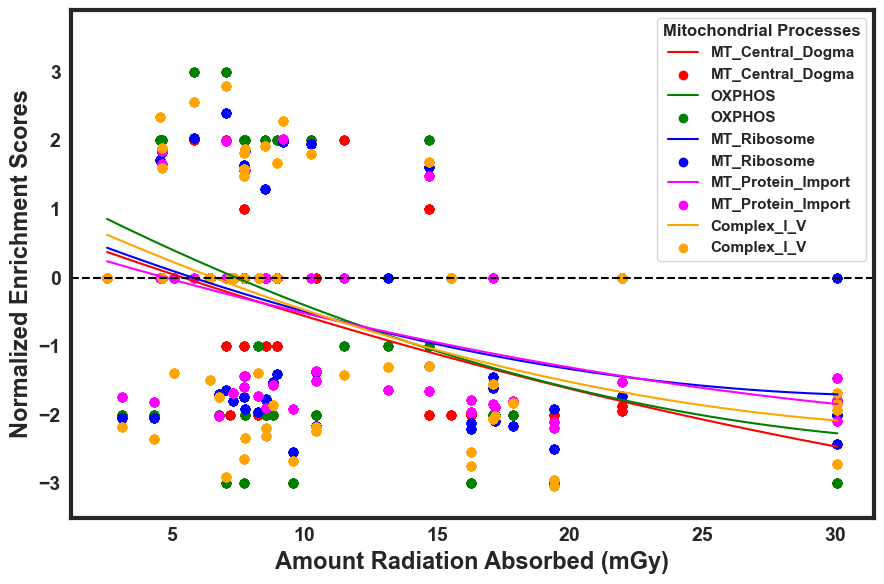

In [16]:
# Curve fit of most correlated Mitochondria Processes against amount of radiation absorbed

# Prepare x data
x = df["mGy_Absorbed"]

# Dictionary of targets to compare
targets = {
    "MT_Central_Dogma": "red",
    "OXPHOS": "green",
    "MT_Ribosome": "blue",
    "MT_Protein_Import": "magenta",
    "Complex_I_V": "orange",
}

    
# Plot setup
plt.figure(figsize=(9, 6))
sns.set(style="white")

# Plot each target variable
for label, color in targets.items():
    y = df[label]
    if len(df) >= 3:
        z = np.polyfit(x, y, 2)
        p = np.poly1d(z)
        x_vals = np.linspace(min(x), max(x), 200)
        plt.plot(x_vals, p(x_vals), label=label, color=color)
        plt.scatter(x, y, label=label, color=color)

# Add horizontal line at y = 0
plt.axhline(y=0, color='black', linewidth=1.5, linestyle='--')

# Customize plot

plt.xlabel("Amount Radiation Absorbed (mGy)", fontsize=17)
plt.ylabel("Normalized Enrichment Scores", fontsize=17)
plt.legend(title="Mitochondrial Processes")
plt.tick_params(labelsize=14, pad=1)

# Customize spines
ax = plt.gca()
ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.set_ylim([-3.5,3.9])
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.tight_layout()
plt.savefig('Most_Correlated_Mitochondrial_Vs_Radiation.tiff',format='tiff', dpi=300, transparent=False)

plt.show()


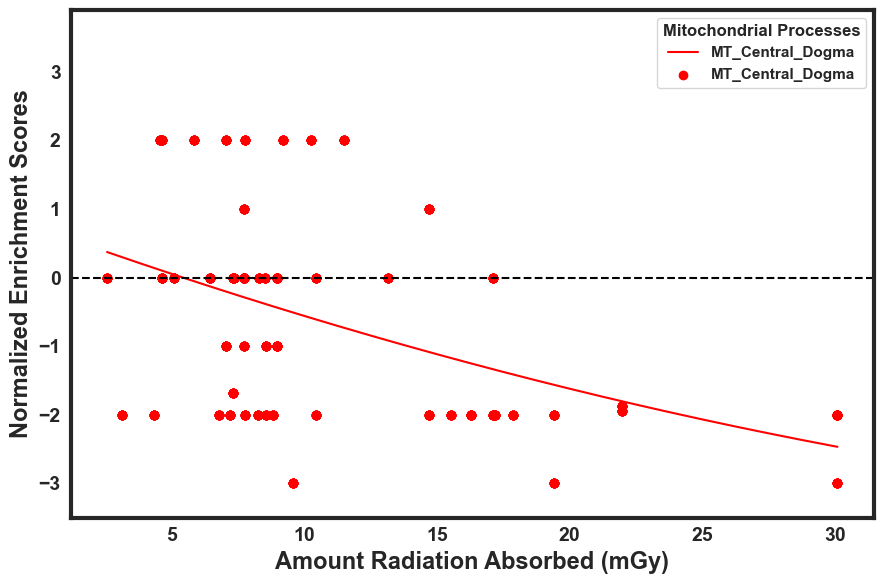

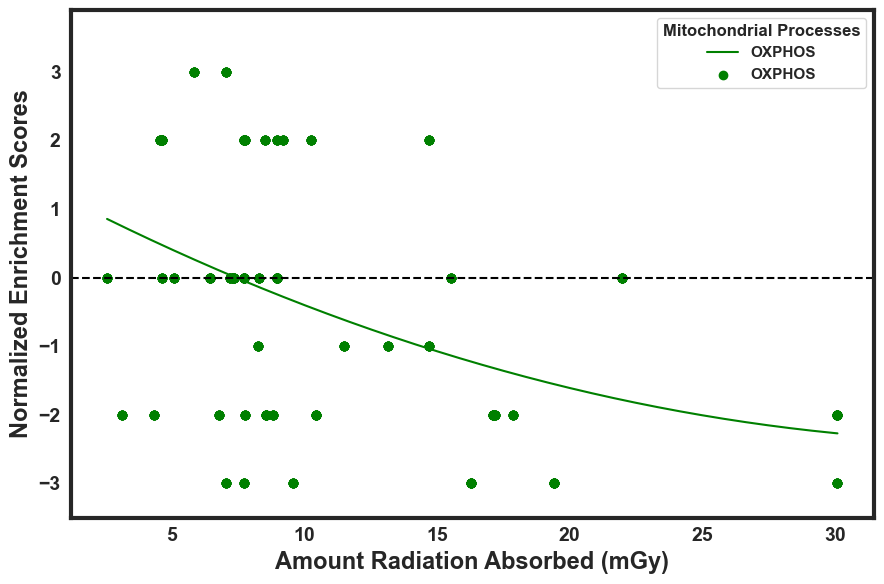

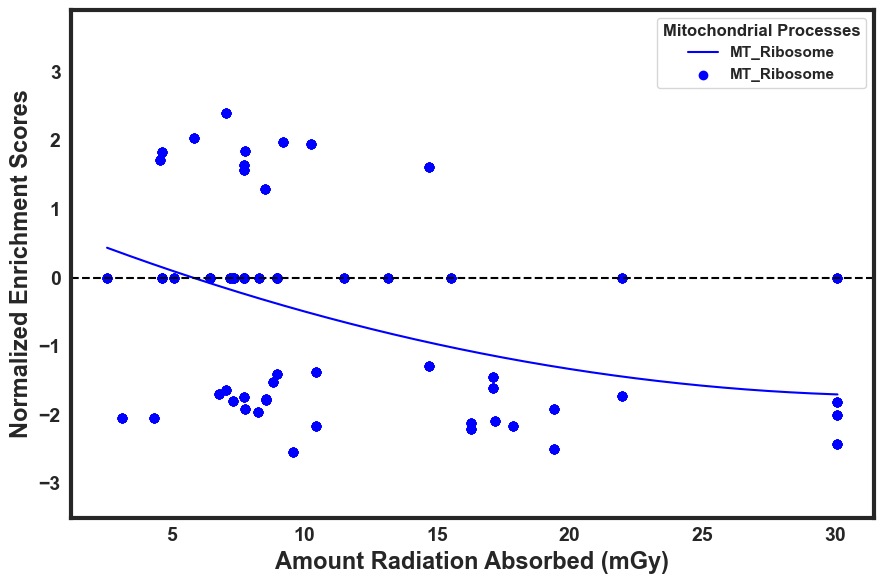

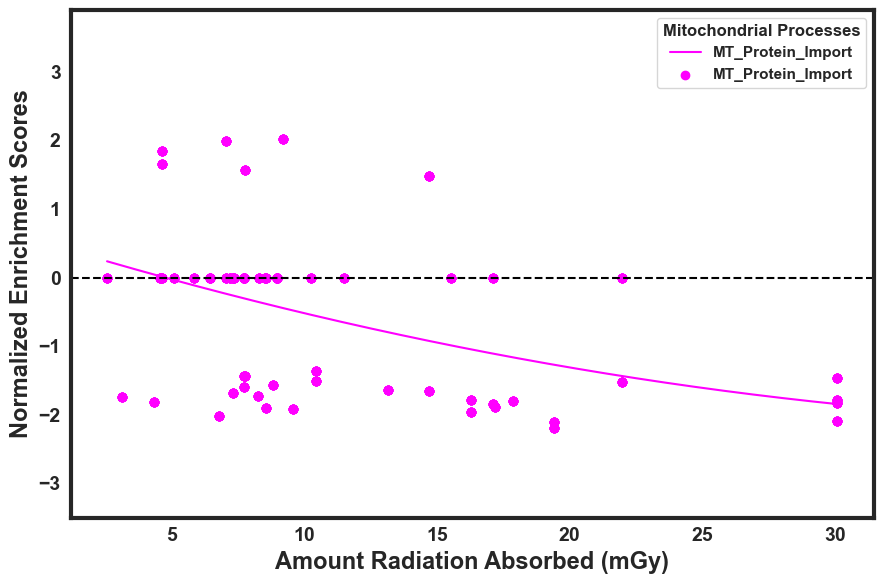

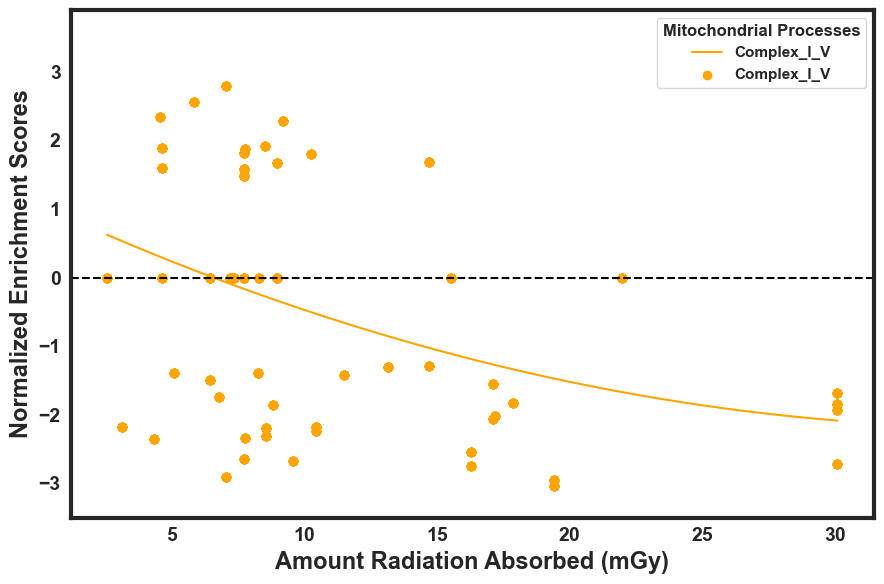

In [14]:
# Curve fit of most correlated Mitochondria Processes against amount of radiation absorbed

# Prepare x data
x = df["mGy_Absorbed"]

# Dictionary of targets to compare
targets = {
    "MT_Central_Dogma": "red",
    "OXPHOS": "green",
    "MT_Ribosome": "blue",
    "MT_Protein_Import": "magenta",
    "Complex_I_V": "orange",
}

    
# Plot setup
# plt.figure(figsize=(9, 6))
# sns.set(style="white")

# Plot each target variable
for label, color in targets.items():
    y = df[label]
    if len(df) >= 3:
        z = np.polyfit(x, y, 2)
        p = np.poly1d(z)
        x_vals = np.linspace(min(x), max(x), 200)
        
        plt.figure(figsize=(9, 6))
        sns.set(style="white")
        plt.plot(x_vals, p(x_vals), label=label, color=color)
        plt.scatter(x, y, label=label, color=color)

        # Add horizontal line at y = 0
        plt.axhline(y=0, color='black', linewidth=1.5, linestyle='--')

        # Customize plot

        plt.xlabel("Amount Radiation Absorbed (mGy)", fontsize=17)
        plt.ylabel("Normalized Enrichment Scores", fontsize=17)
        plt.legend(title="Mitochondrial Processes")
        plt.tick_params(labelsize=14, pad=1)

        # Customize spines
        ax = plt.gca()
        ax.spines["top"].set_linewidth(3)
        ax.spines["left"].set_linewidth(3)
        ax.spines["right"].set_linewidth(3)
        ax.spines["bottom"].set_linewidth(3)
        ax.set_ylim([-3.5,3.9])
        plt.rcParams["font.weight"] = "bold"
        plt.rcParams["axes.labelweight"] = "bold"

        plt.tight_layout()
        plt.savefig(f'Most_Correlated_{label}_Vs_Radiation_Absorbed.tiff',format='tiff', dpi=300, transparent=False)
# plt.savefig('Correlation/Most_Correlated_Mitochondrial_processes_Vs_Radiation_Absorbed.tiff',format='tiff', dpi=300, transparent=False)

plt.show()


#### In-flight vs Post-flight

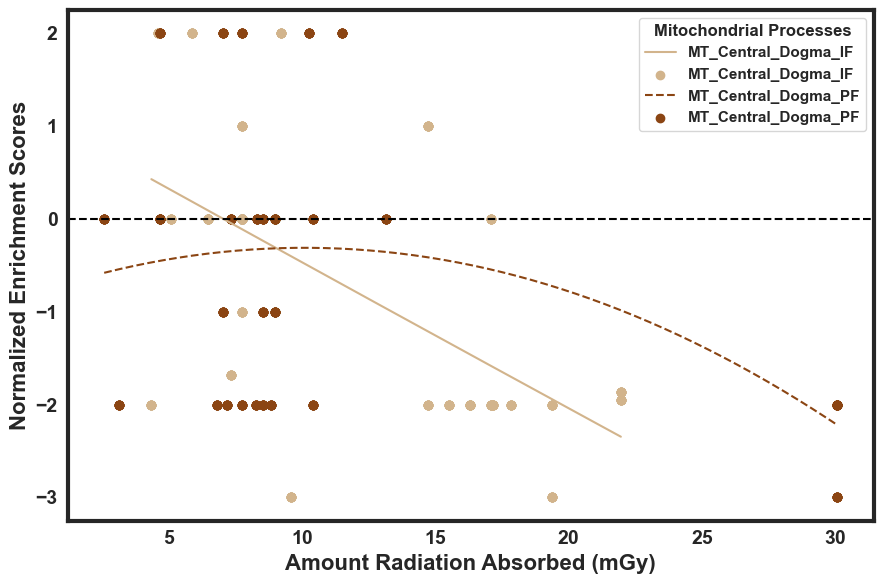

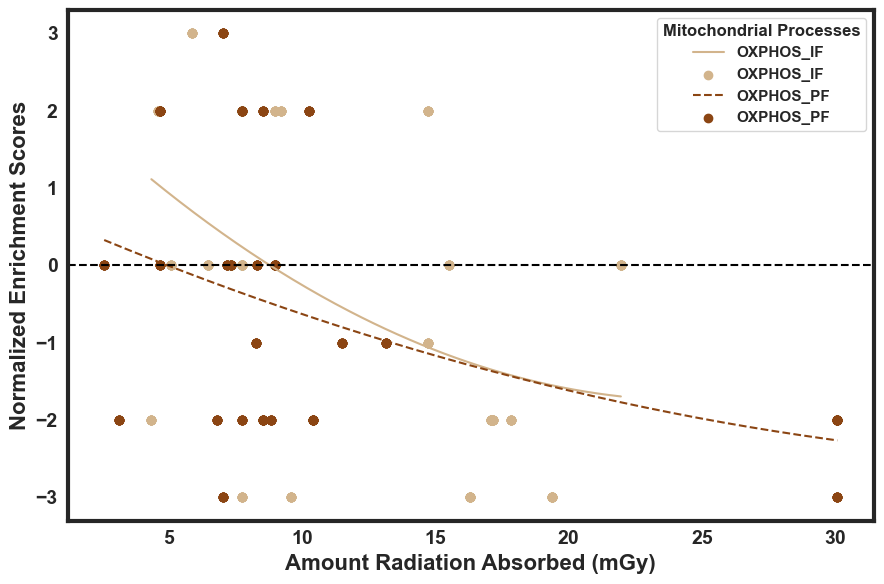

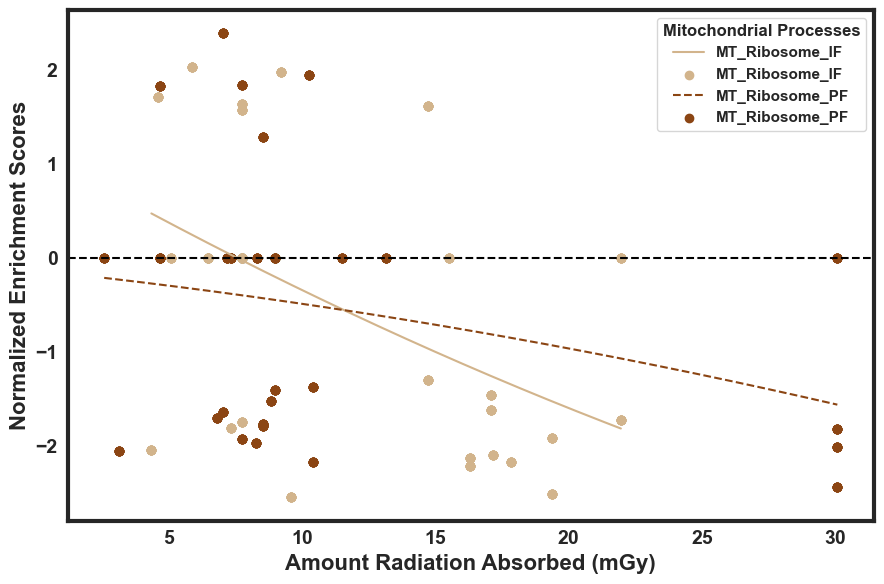

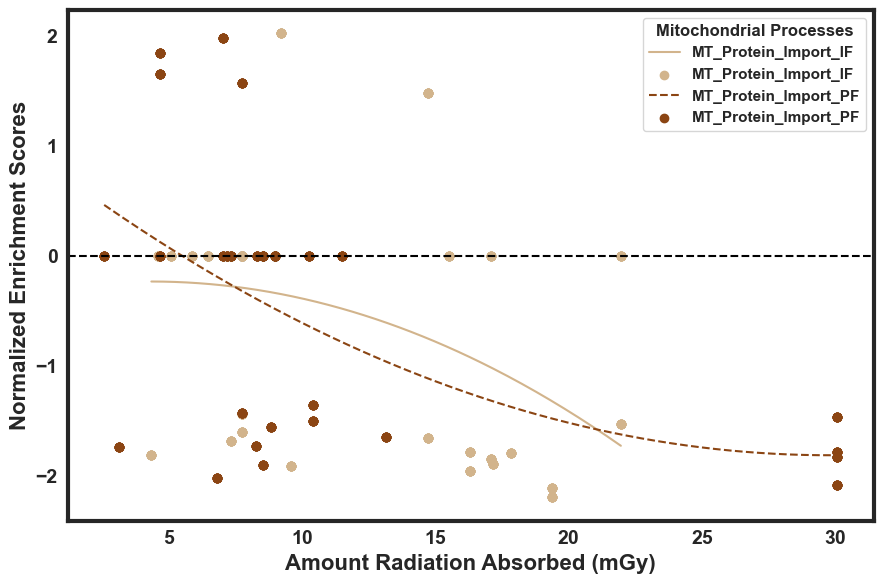

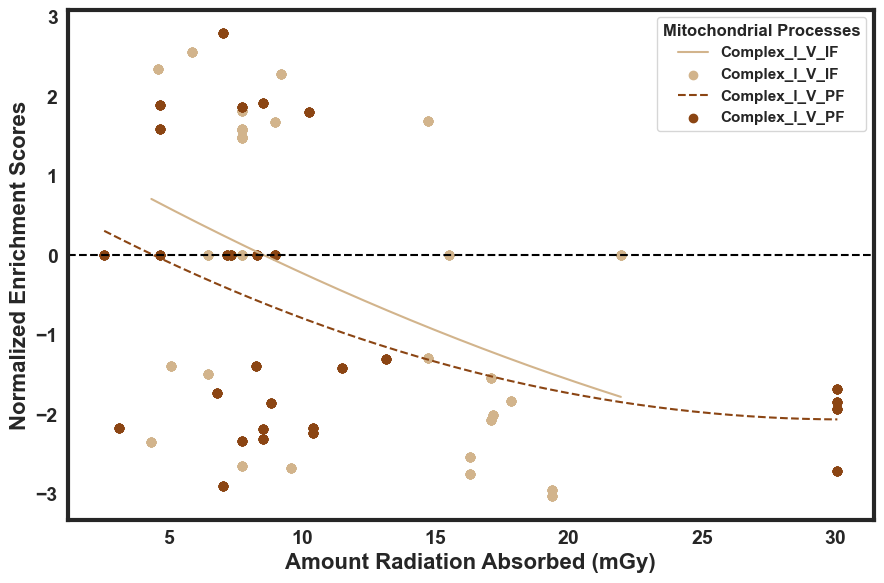

In [ ]:
# Curve fit of most correlated Mitochondria Processes against amount of radiation absorbed

# Prepare x data
x = di["mGy_Absorbed"]
xp = dp["mGy_Absorbed"]

# Dictionary of targets to compare
targets = {
    "MT_Central_Dogma": "red",
    "OXPHOS": "green",
    "MT_Ribosome": "blue",
    "MT_Protein_Import": "magenta",
    "Complex_I_V": "orange", 
}

    
# Plot setup
# plt.figure(figsize=(9, 6))
# sns.set(style="white")

# Plot each target variable
for label, color in targets.items():
    y = di[label]
    if len(di) >= 3:
        z = np.polyfit(x, y, 2)
        p = np.poly1d(z)
        x_vals = np.linspace(min(x), max(x), 200)

        plt.figure(figsize=(9, 6))
        sns.set(style="white")
        
        plt.plot(x_vals, p(x_vals), label=f"{label}_IF", color="tan")
        plt.scatter(x, y, label=f"{label}_IF", color='tan')
        
        yp = dp[label]
        if len(dp) >= 3:
            zp = np.polyfit(xp, yp, 2)
            pp = np.poly1d(zp)
            xp_vals = np.linspace(min(xp), max(xp), 200)
            plt.plot(xp_vals, pp(xp_vals), label=f"{label}_PF", color="saddlebrown", ls='--')
            plt.scatter(xp, yp, label=f"{label}_PF", color='saddlebrown')


            # Add horizontal line at y = 0
            plt.axhline(y=0, color='black', linewidth=1.5, linestyle='--')

            # Customize plot

            plt.xlabel("Amount Radiation Absorbed (mGy)", fontsize=16)
            plt.ylabel("Normalized Enrichment Scores", fontsize=16)
            plt.legend(title="Mitochondrial Processes")
            plt.tick_params(labelsize=14, pad=1)

            # Customize spines
            ax = plt.gca()
            ax.spines["top"].set_linewidth(3)
            ax.spines["left"].set_linewidth(3)
            ax.spines["right"].set_linewidth(3)
            ax.spines["bottom"].set_linewidth(3)

            plt.rcParams["font.weight"] = "bold"
            plt.rcParams["axes.labelweight"] = "bold"

            plt.tight_layout()
            plt.savefig(f'Most_Correlated_{label}_Vs_Radiation_IF&PF.tiff',format='tiff', dpi=300, transparent=False)

# plt.savefig('Correlation/Most_Correlated_Mitochondrial_processes_Vs_Radiation_Absorbed_1.svg',format='svg', dpi=600, transparent=False)
# plt.savefig('Correlation/Most_Correlated_Mitochondrial_processes_Vs_Radiation_Absorbed_2.svg',format='svg', dpi=600, transparent=False)

plt.show()


##### Metabolic Prcesses

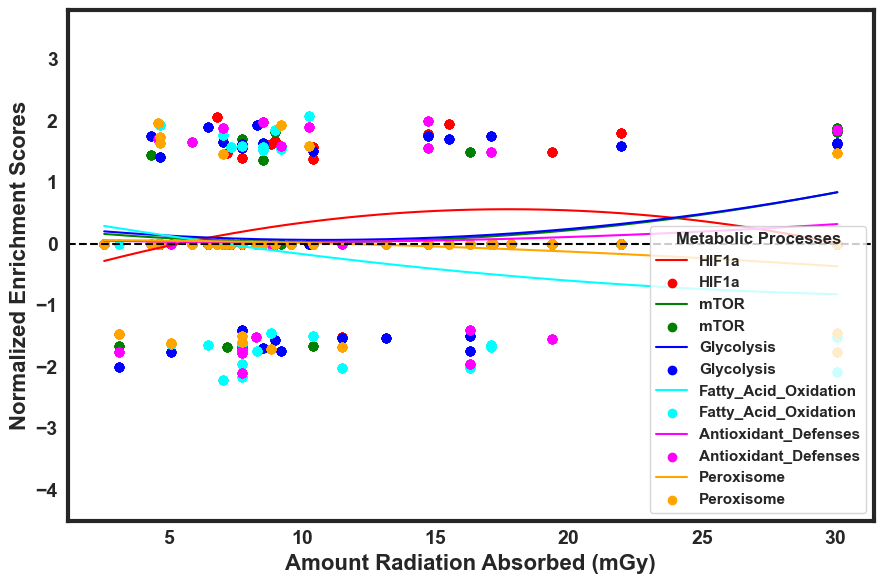

In [41]:
# Curve fit of most correlated Metabolic Processes against amount of radiation absorbed

# Prepare x data
x = df["mGy_Absorbed"]

# Dictionary of targets to compare


targets = {
    "HIF1a": "red",
    "mTOR": "green",
    "Glycolysis": "blue",
    "Fatty_Acid_Oxidation": "cyan",
    # "Folate_Single_Carbon": "magenta",
    "Antioxidant_Defenses": "magenta", 
    "Peroxisome": "orange",
}

    
# Plot setup
plt.figure(figsize=(9, 6))
sns.set(style="white")

# Plot each target variable
for label, color in targets.items():
    y = df[label]
    if len(df) >= 3:
        z = np.polyfit(x, y, 2)
        p = np.poly1d(z)
        x_vals = np.linspace(min(x), max(x), 200)
        plt.plot(x_vals, p(x_vals), label=label, color=color)
        plt.scatter(x, y, label=label, color=color)

# Add horizontal line at y = 0
plt.axhline(y=0, color='black', linewidth=1.5, linestyle='--')

# Customize plot

plt.xlabel("Amount Radiation Absorbed (mGy)", fontsize=16)
plt.ylabel("Normalized Enrichment Scores", fontsize=16)
plt.legend(title="Metabolic Processes")
plt.tick_params(labelsize=14, pad=1)

# Customize spines
ax = plt.gca()
ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.set_ylim([-4.5,3.8])

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.tight_layout()
plt.savefig('Most_Correlated_Metabolic_processes_Vs_Radiation_Absorbed.tiff',format='tiff', dpi=300, transparent=False)
plt.show()


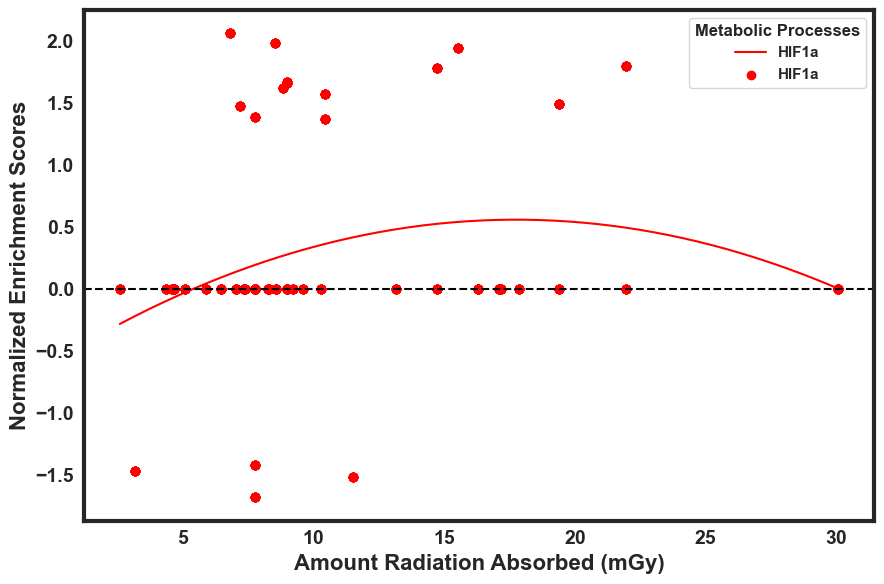

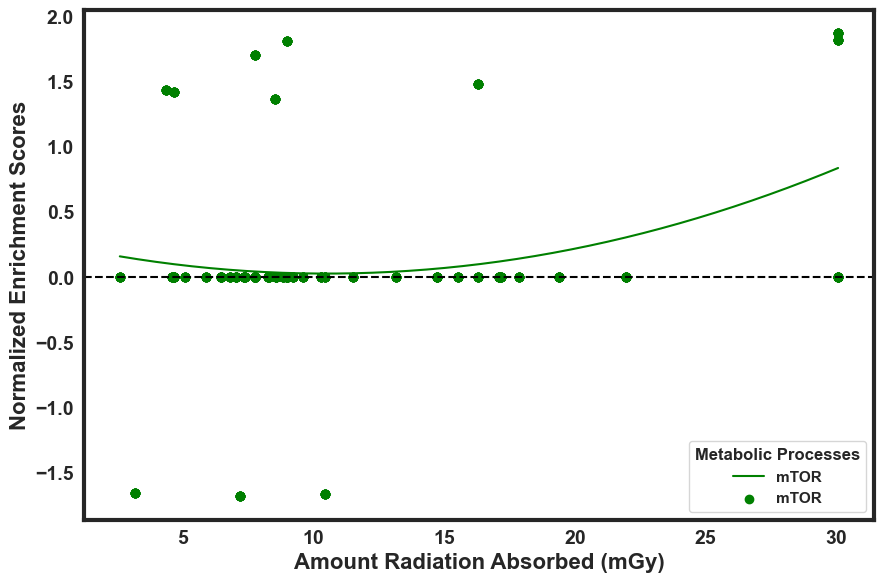

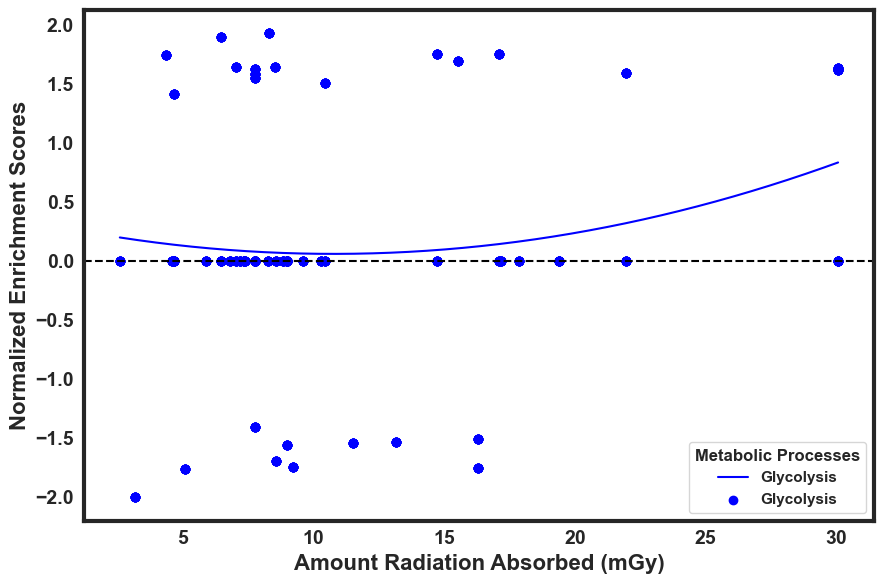

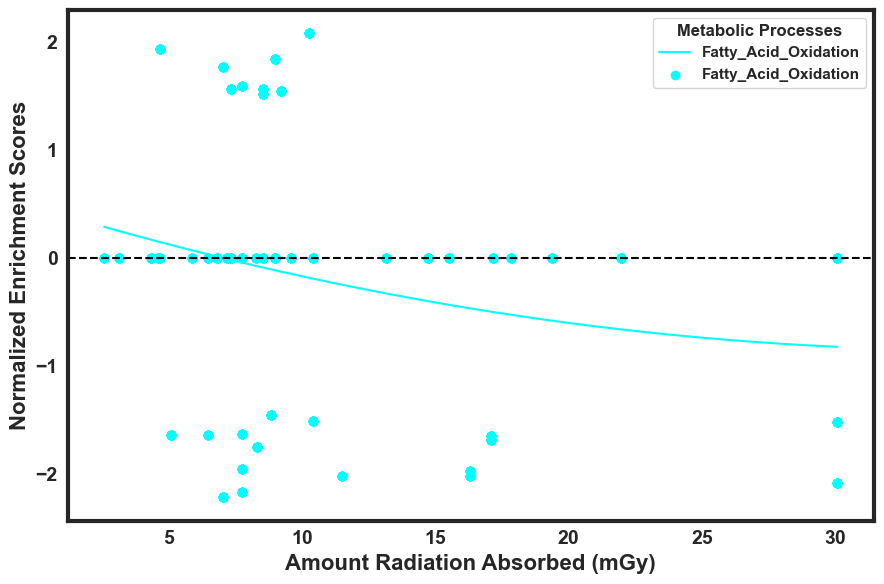

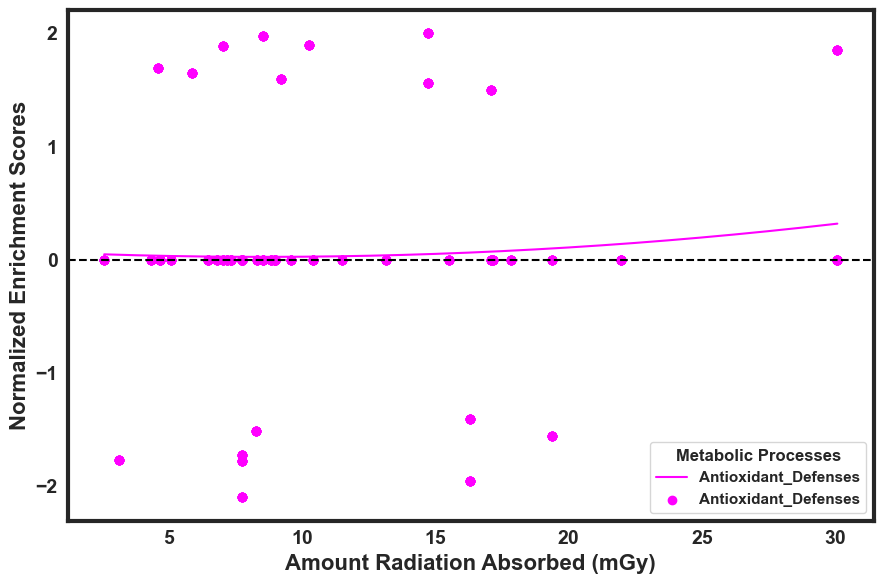

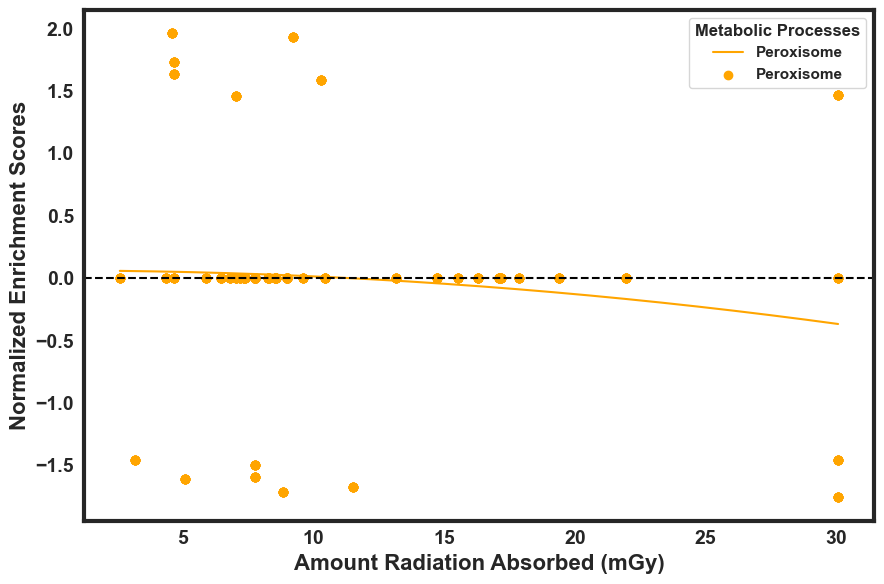

In [52]:
# Curve fit of most correlated Metabolic Processes against amount of radiation absorbed

# Prepare x data
x = df["mGy_Absorbed"]

# Dictionary of targets to compare
targets = {
    "HIF1a": "red",
    "mTOR": "green",
    "Glycolysis": "blue",
    "Fatty_Acid_Oxidation": "cyan",
    # "Folate_Single_Carbon": "magenta",
    "Antioxidant_Defenses": "magenta", 
    "Peroxisome": "orange",
}

# Plot setup
# plt.figure(figsize=(9, 6))
# sns.set(style="white")

# Plot each target variable
for label, color in targets.items():
    y = df[label]
    if len(df) >= 3:
        z = np.polyfit(x, y, 2)
        p = np.poly1d(z)

        plt.figure(figsize=(9, 6))
        sns.set(style="white")
        x_vals = np.linspace(min(x), max(x), 200)
        plt.plot(x_vals, p(x_vals), label=label, color=color)
        plt.scatter(x, y, label=label, color=color)

        # Add horizontal line at y = 0
        plt.axhline(y=0, color='black', linewidth=1.5, linestyle='--')

        # Customize plot

        plt.xlabel("Amount Radiation Absorbed (mGy)", fontsize=16)
        plt.ylabel("Normalized Enrichment Scores", fontsize=16)
        plt.legend(title="Metabolic Processes")
        plt.tick_params(labelsize=14, pad=1)

        # Customize spines
        ax = plt.gca()
        ax.spines["top"].set_linewidth(3)
        ax.spines["left"].set_linewidth(3)
        ax.spines["right"].set_linewidth(3)
        ax.spines["bottom"].set_linewidth(3)
        # ax.set_ylim([-4.5,3.8])
        plt.rcParams["font.weight"] = "bold"
        plt.rcParams["axes.labelweight"] = "bold"

        plt.tight_layout()
        plt.savefig(f'Most_Correlated_{label}_Vs_Radiation.tiff',format='tiff', dpi=300, transparent=False)
plt.show()



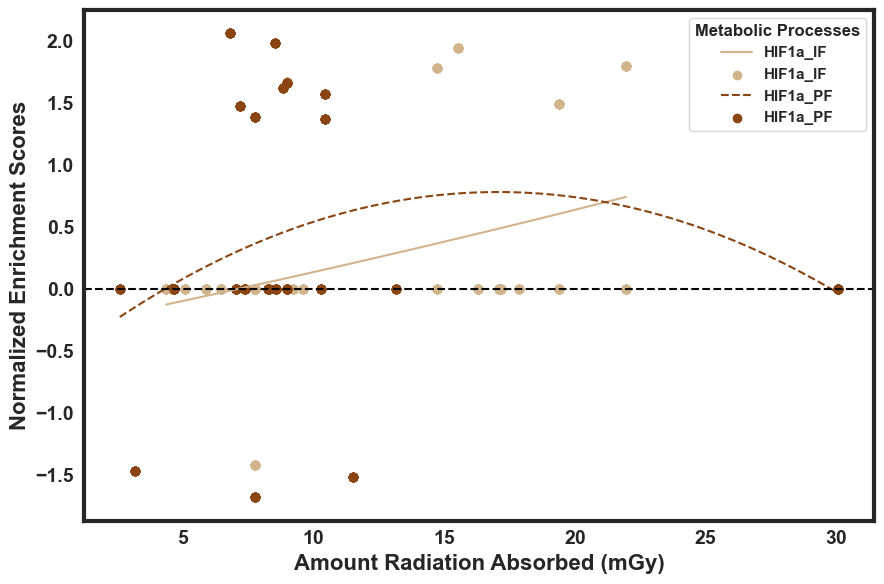

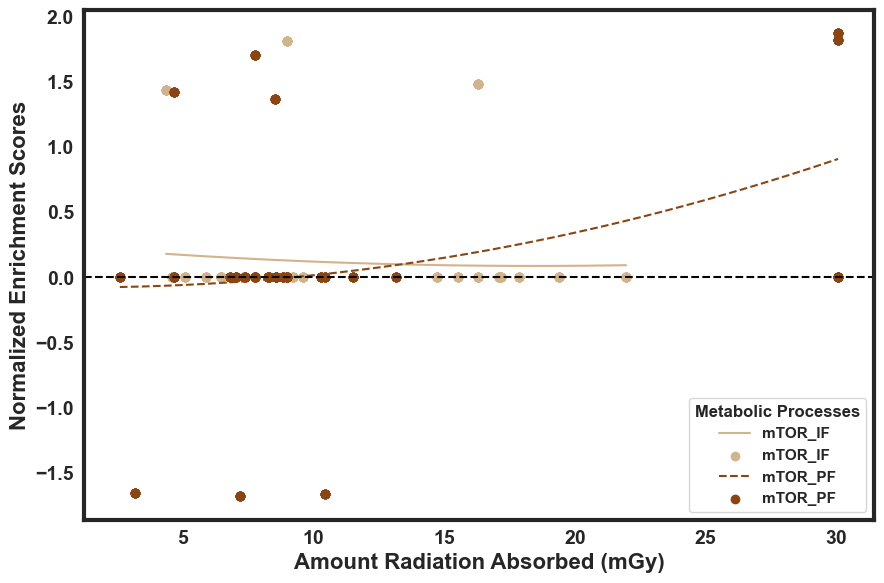

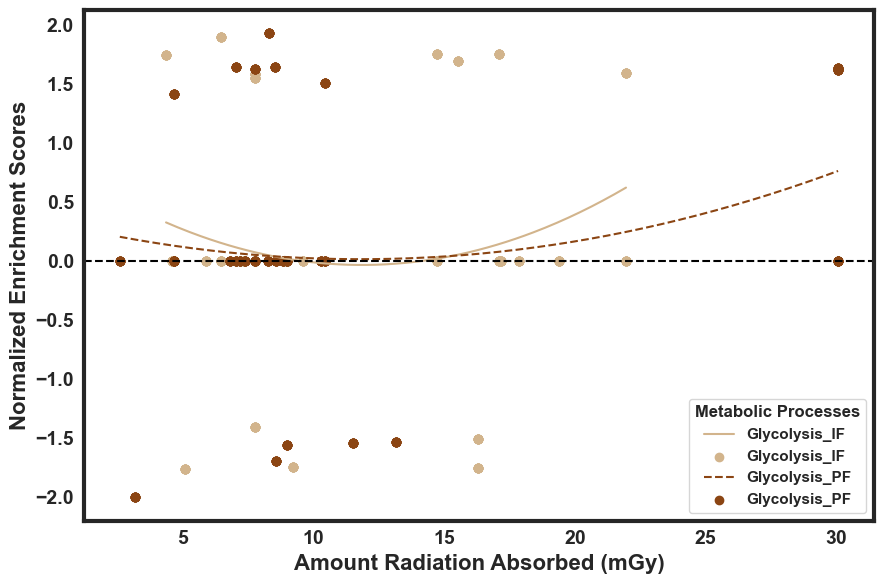

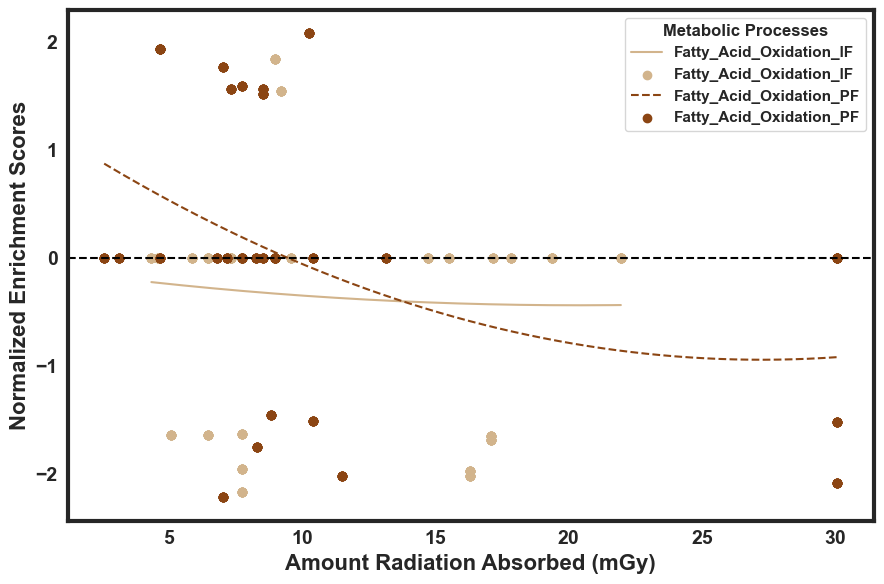

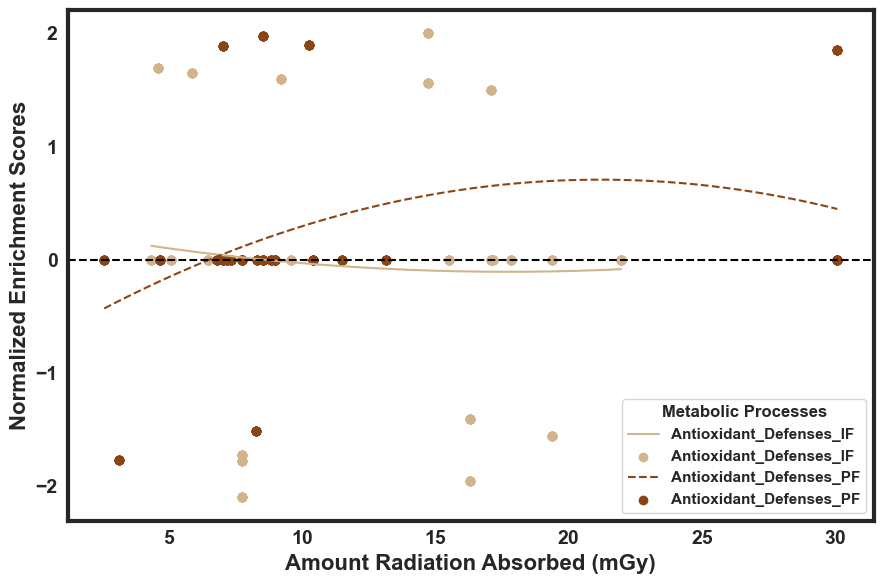

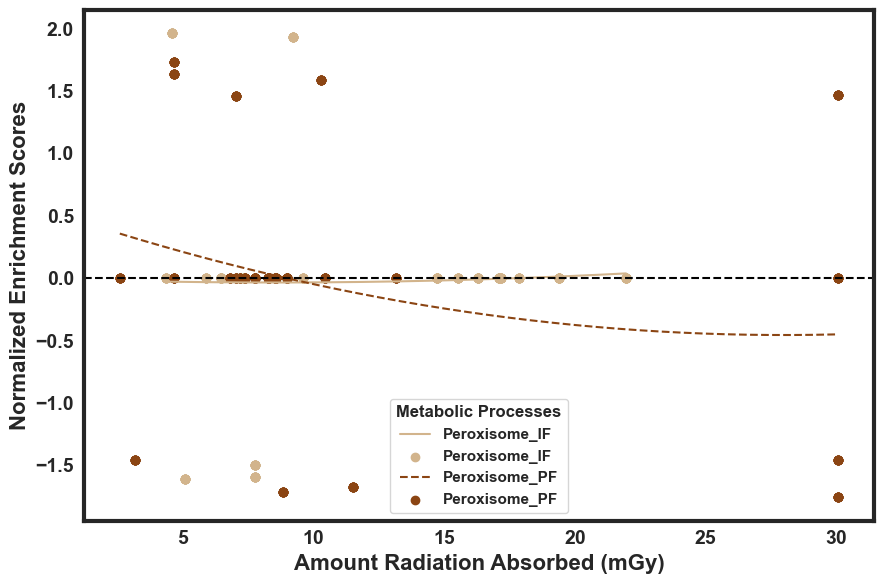

In [36]:
# Curve fit of most correlated Mitochondria Processes against amount of radiation absorbed

# Prepare x data
x = di["mGy_Absorbed"]
xp = dp["mGy_Absorbed"]

# Dictionary of targets to compare
targets = {
    "HIF1a": "red",
    "mTOR": "green",
    "Glycolysis": "blue",
    "Fatty_Acid_Oxidation": "cyan",
    # "Folate_Single_Carbon": "magenta",
    "Antioxidant_Defenses": "magenta", 
    "Peroxisome": "orange",
}

    
# Plot setup
# plt.figure(figsize=(9, 6))
# sns.set(style="white")

# Plot each target variable
for label, color in targets.items():
    y = di[label]
    if len(di) >= 3:
        z = np.polyfit(x, y, 2)
        p = np.poly1d(z)
        x_vals = np.linspace(min(x), max(x), 200)

        plt.figure(figsize=(9, 6))
        sns.set(style="white")
        
        plt.plot(x_vals, p(x_vals), label=f"{label}_IF", color="tan")
        plt.scatter(x, y, label=f"{label}_IF", color='tan')
        
        yp = dp[label]
        if len(dp) >= 3:
            zp = np.polyfit(xp, yp, 2)
            pp = np.poly1d(zp)
            xp_vals = np.linspace(min(xp), max(xp), 200)
            plt.plot(xp_vals, pp(xp_vals), label=f"{label}_PF", color="saddlebrown", ls='--')
            plt.scatter(xp, yp, label=f"{label}_PF", color='saddlebrown')


            # Add horizontal line at y = 0
            plt.axhline(y=0, color='black', linewidth=1.5, linestyle='--')

            # Customize plot

            plt.xlabel("Amount Radiation Absorbed (mGy)", fontsize=16)
            plt.ylabel("Normalized Enrichment Scores", fontsize=16)
            plt.legend(title="Metabolic Processes")
            plt.tick_params(labelsize=14, pad=1)

            # Customize spines
            ax = plt.gca()
            ax.spines["top"].set_linewidth(3)
            ax.spines["left"].set_linewidth(3)
            ax.spines["right"].set_linewidth(3)
            ax.spines["bottom"].set_linewidth(3)

            plt.rcParams["font.weight"] = "bold"
            plt.rcParams["axes.labelweight"] = "bold"

            plt.tight_layout()
            plt.savefig(f'Most_Correlated_{label}_Vs_Radiation_IF&PF.tiff',format='tiff', dpi=300, transparent=False)

plt.show()


##### Immunity and Cell Stress

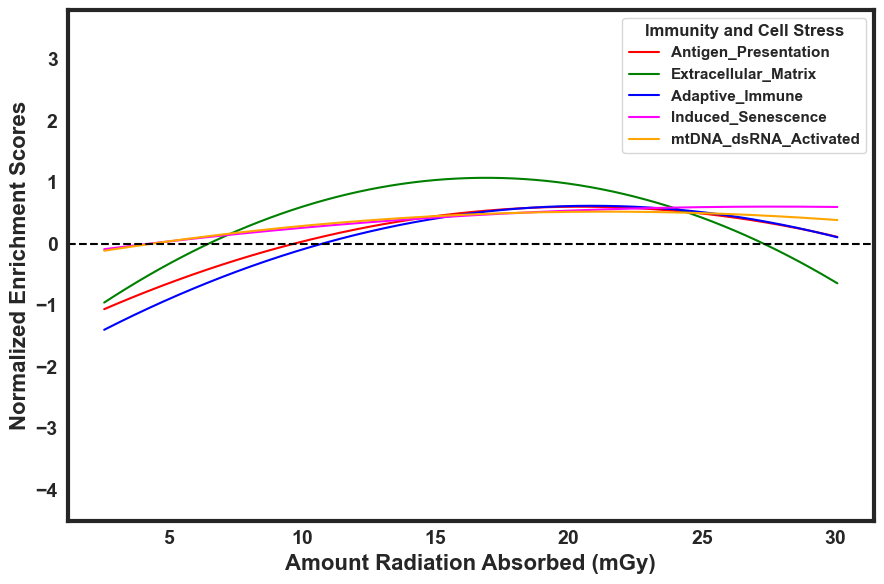

In [43]:
# Curve fit of most correlated Metabolic Processes against amount of radiation absorbed

# Prepare x data
x = df["mGy_Absorbed"]

# Dictionary of targets to compare
targets = {
    "Antigen_Presentation": "red", 
    "Extracellular_Matrix": "green",
    "Adaptive_Immune": "blue",
    "Induced_Senescence": "magenta",
    "mtDNA_dsRNA_Activated": "orange", 
}

# Plot setup
plt.figure(figsize=(9, 6))
sns.set(style="white")

# Plot each target variable
for label, color in targets.items():
    y = df[label]
    if len(df) >= 3:
        z = np.polyfit(x, y, 2)
        p = np.poly1d(z)
        x_vals = np.linspace(min(x), max(x), 200)
        plt.plot(x_vals, p(x_vals), label=label, color=color)
        # plt.scatter(x, y, label=label, color=color)

# Add horizontal line at y = 0
plt.axhline(y=0, color='black', linewidth=1.5, linestyle='--')

# Customize plot

plt.xlabel("Amount Radiation Absorbed (mGy)", fontsize=16)
plt.ylabel("Normalized Enrichment Scores", fontsize=16)
plt.legend(title="Immunity and Cell Stress")
plt.tick_params(labelsize=14, pad=1)

# Customize spines
ax = plt.gca()
ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.set_ylim([-4.5,3.8])
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.tight_layout()
plt.savefig('Most_Correlated_Immunity_Vs_Radiation_Absorbed_fit.tiff',format='tiff', dpi=300, transparent=False)
plt.show()

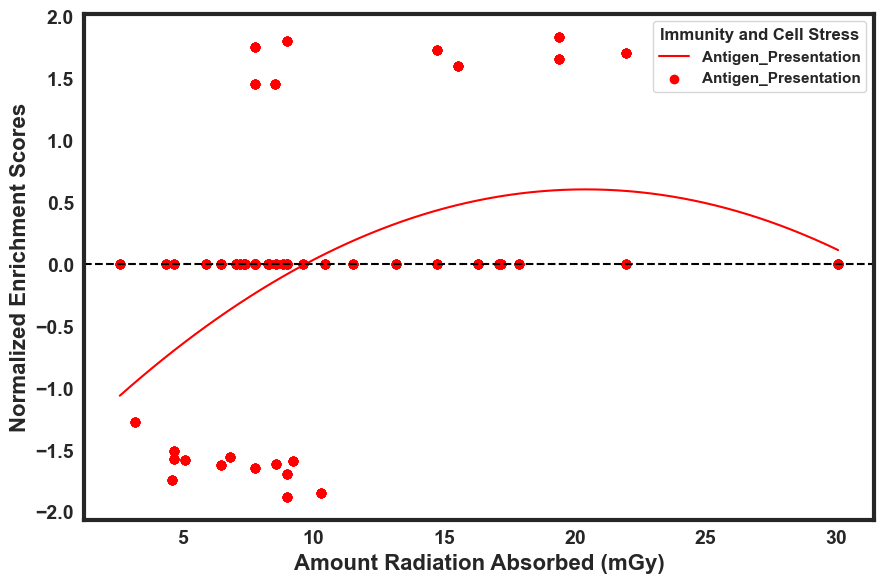

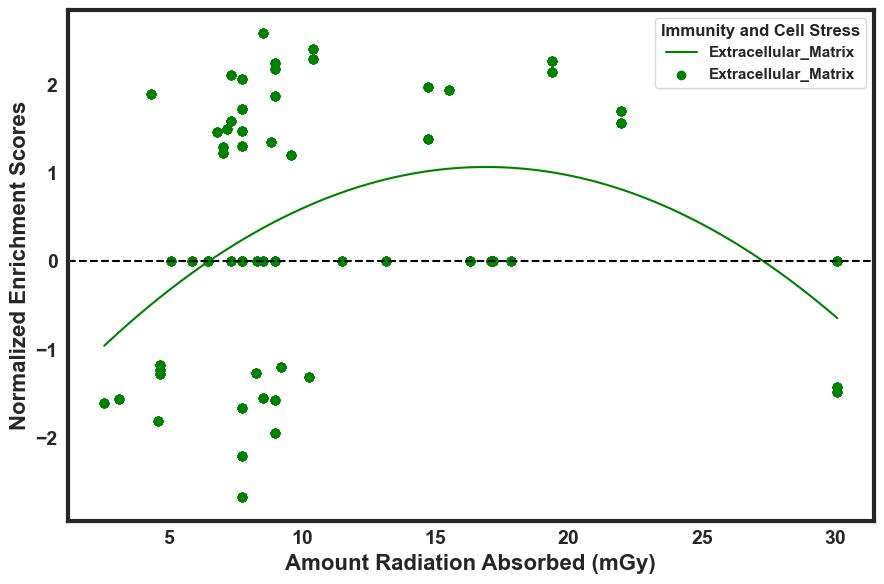

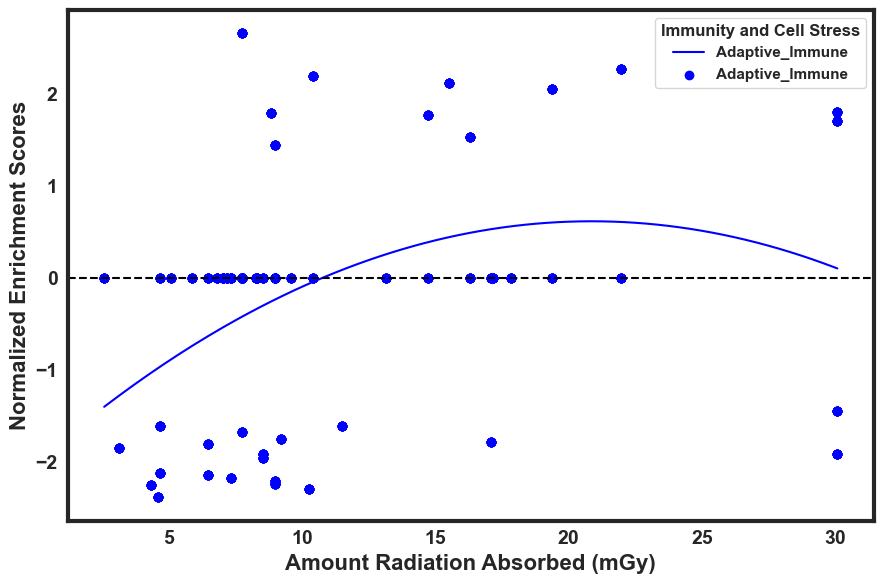

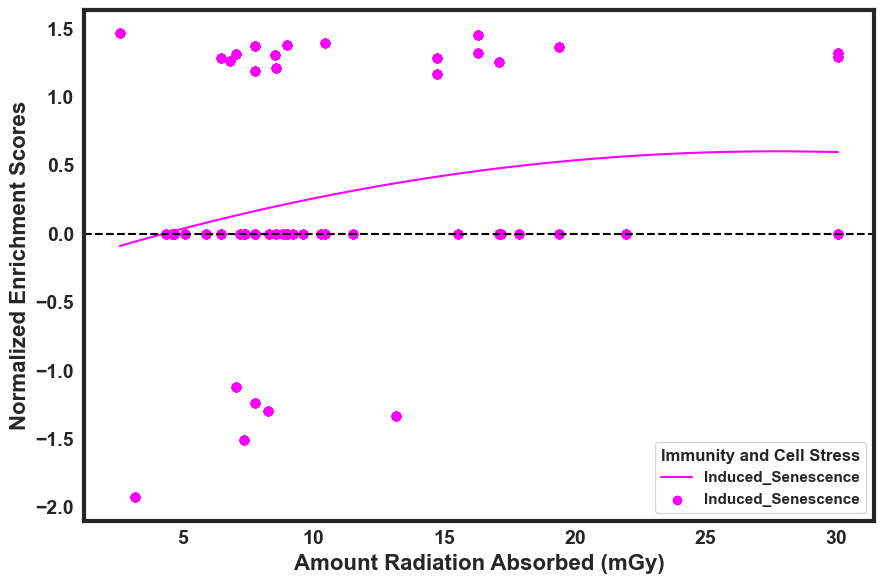

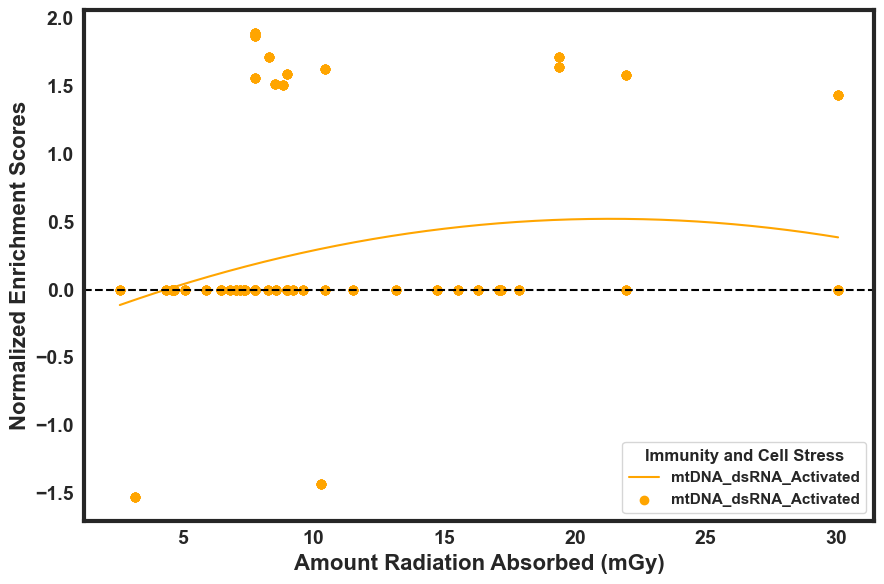

In [ ]:
# Curve fit of most correlated Metabolic Processes against amount of radiation absorbed

# Prepare x data
x = df["mGy_Absorbed"]

# Dictionary of targets to compare
targets = {
    "Antigen_Presentation": "red", 
    "Extracellular_Matrix": "green",
    "Adaptive_Immune": "blue",
    "Induced_Senescence": "magenta",
    "mtDNA_dsRNA_Activated": "orange", 
}

# Plot setup
# plt.figure(figsize=(9, 6))
# sns.set(style="white")

# Plot each target variable
for label, color in targets.items():
    y = df[label]
    if len(df) >= 3:
        z = np.polyfit(x, y, 2)
        p = np.poly1d(z)

        plt.figure(figsize=(9, 6))
        sns.set(style="white")
        x_vals = np.linspace(min(x), max(x), 200)
        plt.plot(x_vals, p(x_vals), label=label, color=color)
        plt.scatter(x, y, label=label, color=color)

        # Add horizontal line at y = 0
        plt.axhline(y=0, color='black', linewidth=1.5, linestyle='--')

        # Customize plot

        plt.xlabel("Amount Radiation Absorbed (mGy)", fontsize=16)
        plt.ylabel("Normalized Enrichment Scores", fontsize=16)
        plt.legend(title="Immunity and Cell Stress")
        plt.tick_params(labelsize=14, pad=1)

        # Customize spines
        ax = plt.gca()
        ax.spines["top"].set_linewidth(3)
        ax.spines["left"].set_linewidth(3)
        ax.spines["right"].set_linewidth(3)
        ax.spines["bottom"].set_linewidth(3)
        # ax.set_ylim([-4.5,3.8])
        plt.rcParams["font.weight"] = "bold"
        plt.rcParams["axes.labelweight"] = "bold"

        plt.tight_layout()
        plt.savefig(f'Most_Correlated_{label}_Vs_Radiation.tiff',format='tiff', dpi=300, transparent=False)
plt.show()



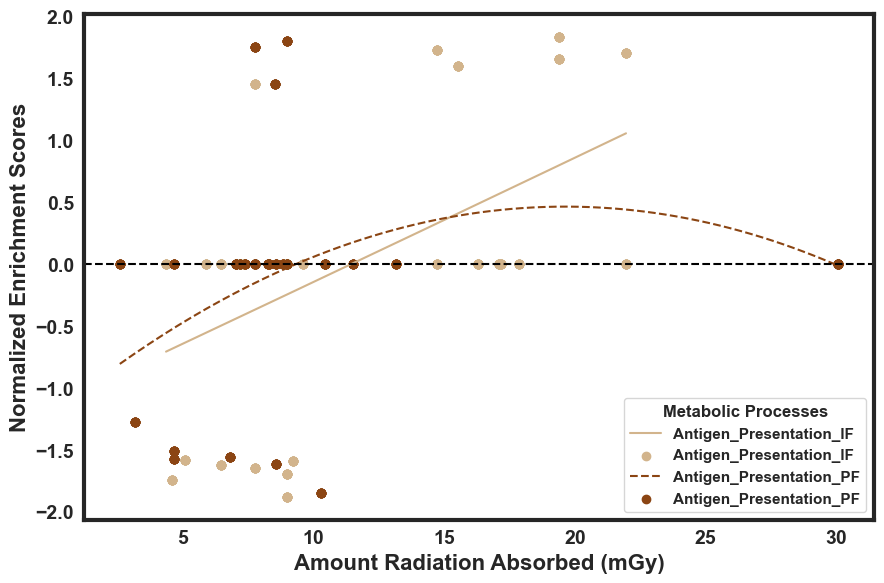

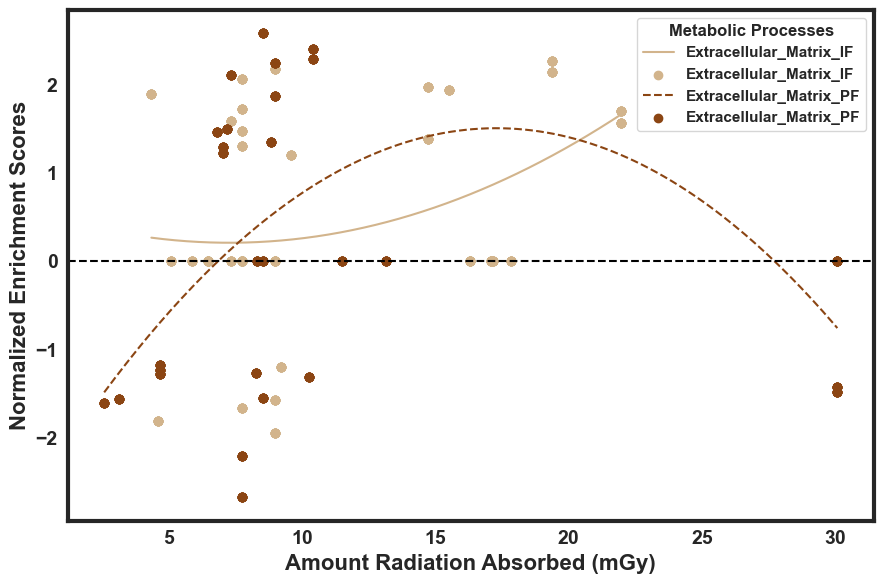

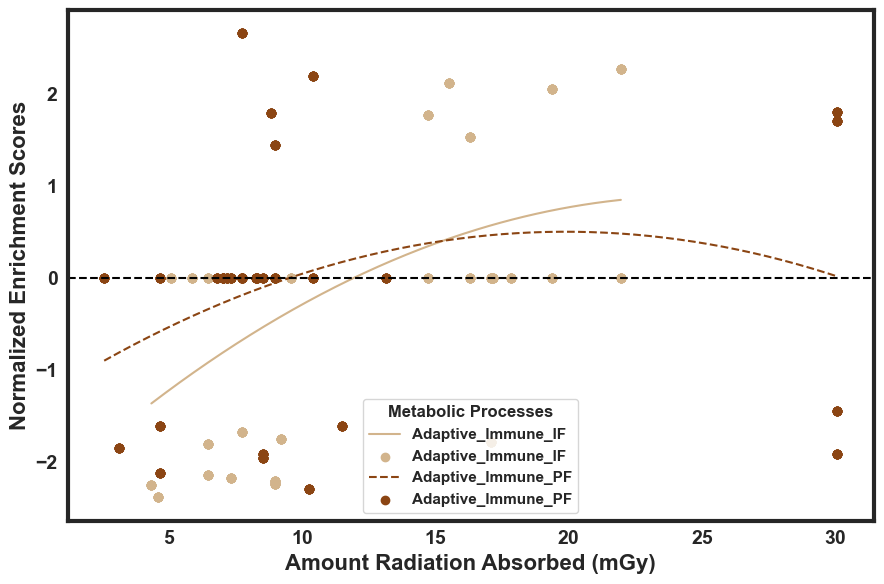

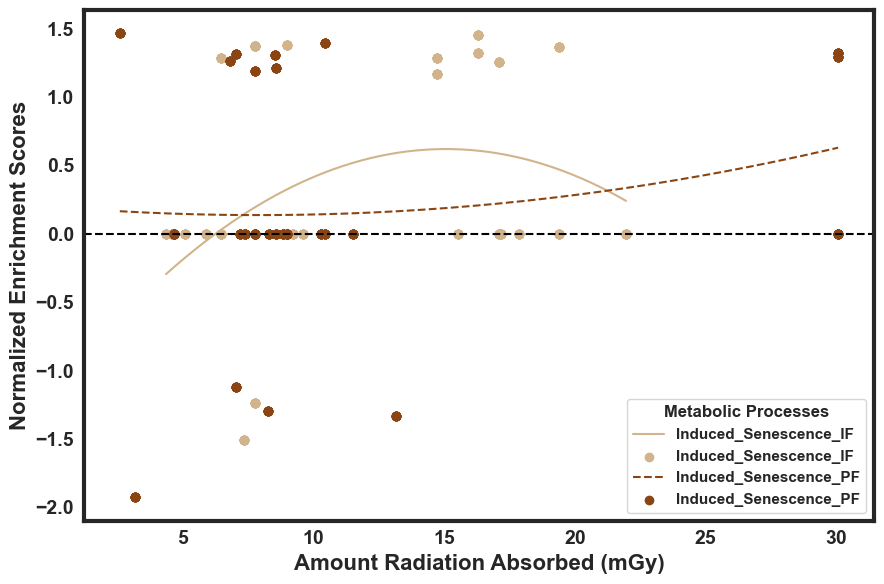

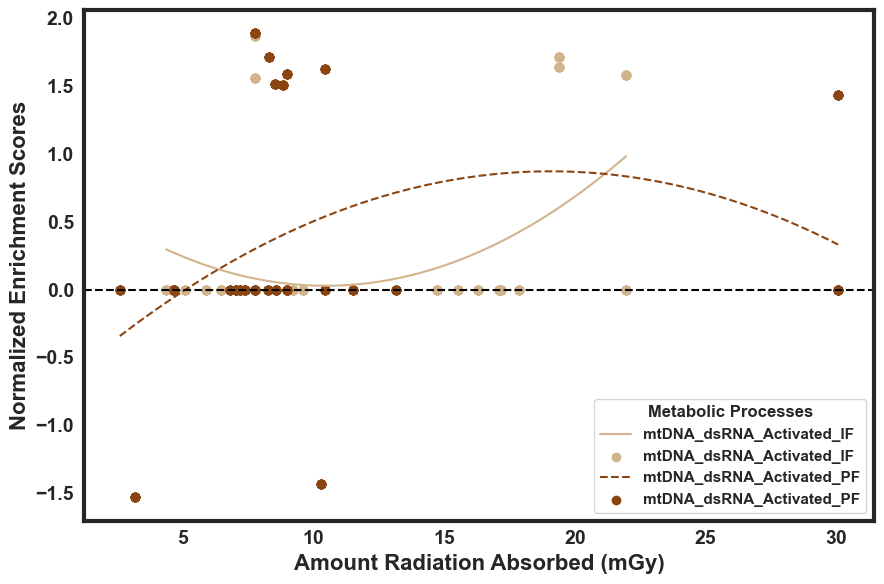

In [45]:
# Curve fit of most correlated Mitochondria Processes against amount of radiation absorbed

# Prepare x data
x = di["mGy_Absorbed"]
xp = dp["mGy_Absorbed"]

# Dictionary of targets to compare
targets = {
    "Antigen_Presentation": "red", 
    "Extracellular_Matrix": "green",
    "Adaptive_Immune": "blue",
    "Induced_Senescence": "magenta",
    "mtDNA_dsRNA_Activated": "orange", 
}

    
# Plot setup
# plt.figure(figsize=(9, 6))
# sns.set(style="white")

# Plot each target variable
for label, color in targets.items():
    y = di[label]
    if len(di) >= 3:
        z = np.polyfit(x, y, 2)
        p = np.poly1d(z)
        x_vals = np.linspace(min(x), max(x), 200)

        plt.figure(figsize=(9, 6))
        sns.set(style="white")
        
        plt.plot(x_vals, p(x_vals), label=f"{label}_IF", color="tan")
        plt.scatter(x, y, label=f"{label}_IF", color='tan')
        
        yp = dp[label]
        if len(dp) >= 3:
            zp = np.polyfit(xp, yp, 2)
            pp = np.poly1d(zp)
            xp_vals = np.linspace(min(xp), max(xp), 200)
            plt.plot(xp_vals, pp(xp_vals), label=f"{label}_PF", color="saddlebrown", ls='--')
            plt.scatter(xp, yp, label=f"{label}_PF", color='saddlebrown')


            # Add horizontal line at y = 0
            plt.axhline(y=0, color='black', linewidth=1.5, linestyle='--')

            # Customize plot

            plt.xlabel("Amount Radiation Absorbed (mGy)", fontsize=16)
            plt.ylabel("Normalized Enrichment Scores", fontsize=16)
            plt.legend(title="Metabolic Processes")
            plt.tick_params(labelsize=14, pad=1)

            # Customize spines
            ax = plt.gca()
            ax.spines["top"].set_linewidth(3)
            ax.spines["left"].set_linewidth(3)
            ax.spines["right"].set_linewidth(3)
            ax.spines["bottom"].set_linewidth(3)

            plt.rcParams["font.weight"] = "bold"
            plt.rcParams["axes.labelweight"] = "bold"

            plt.tight_layout()
            plt.savefig(f'Most_Correlated_{label}_Vs_Radiation_IF&PF.tiff',format='tiff', dpi=300, transparent=False)

plt.show()
